# Example of an end-to-end data science pipeline
## Advanced Python for Life Sciences @ Physalia courses (Summer 2025)
### Marco Chierici, Fondazione Bruno Kessler - Data Science For Health

# Importing data from GEO

`!pip install GEOparse` if needed

In [2]:
!pip install GEOparse

In [3]:
import GEOparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import itertools

In [5]:
gse_id = "GSE20271"
geo_dir = "data"
os.makedirs(geo_dir, exist_ok=True)
# if you need to download from GEO:
gse = GEOparse.get_GEO(geo=gse_id, destdir=geo_dir)
# if you already have the SOFT file locally:
gse = GEOparse.get_GEO(filepath=os.path.join(geo_dir, gse_id + "_family.soft.gz"))

03-Jul-2025 10:34:10 DEBUG utils - Directory data already exists. Skipping.
03-Jul-2025 10:34:10 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE20nnn/GSE20271/soft/GSE20271_family.soft.gz to data/GSE20271_family.soft.gz
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31.3M/31.3M [00:07<00:00, 4.20MB/s]
03-Jul-2025 10:34:19 DEBUG downloader - Size validation passed
03-Jul-2025 10:34:19 DEBUG downloader - Moving /tmp/tmp0ygrpsd5 to /home/gracie/Downloads/day4-20250702T073025Z-1-001/data/GSE20271_family.soft.gz
03-Jul-2025 10:34:19 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE20nnn/GSE20271/soft/GSE20271_family.soft.gz
03-Jul-2025 10:34:19 INFO GEOparse - Parsing data/GSE20271_family.soft.gz: 
03-Jul-2025 10:34:19 DEBUG GEOparse - DATABASE: GeoMiame
03-Jul-2025 10:34:19 DEBUG GEOparse - SERIES: GSE20271
03-Jul-2025 10:34:19

The `geo_GEO` method reads a SOFT-formatted file from GEO and stores it in a object of class `GEOparse.GSE`.

In [6]:
print(gse)

<SERIES: GSE20271 - 178 SAMPLES, 1 d(s)>


Info about the platform that generated the data:

In [7]:
gse.gpls

{'GPL96': <d: GPL96>}

In [8]:
gse.gpls["GPL96"].columns

,description
ID,"Affymetrix Probe Set ID LINK_PRE:""https://www...."
GB_ACC,"GenBank Accession Number LINK_PRE:""http://www...."
SPOT_ID,identifies controls
Species Scientific Name,The genus and species of the organism represen...
Annotation Date,The date that the annotations for this probe a...
Sequence Type,
Sequence Source,The database from which the sequence used to d...
Target Description,
Representative Public ID,The accession number of a representative seque...
Gene Title,Title of Gene represented by the probe set.


Info about samples and corresponding data:

In [9]:
gse.gsms

{'GSM508012': <SAMPLE: GSM508012>,
 'GSM508013': <SAMPLE: GSM508013>,
 'GSM508014': <SAMPLE: GSM508014>,
 'GSM508015': <SAMPLE: GSM508015>,
 'GSM508016': <SAMPLE: GSM508016>,
 'GSM508017': <SAMPLE: GSM508017>,
 'GSM508018': <SAMPLE: GSM508018>,
 'GSM508019': <SAMPLE: GSM508019>,
 'GSM508020': <SAMPLE: GSM508020>,
 'GSM508021': <SAMPLE: GSM508021>,
 'GSM508022': <SAMPLE: GSM508022>,
 'GSM508023': <SAMPLE: GSM508023>,
 'GSM508024': <SAMPLE: GSM508024>,
 'GSM508025': <SAMPLE: GSM508025>,
 'GSM508026': <SAMPLE: GSM508026>,
 'GSM508027': <SAMPLE: GSM508027>,
 'GSM508028': <SAMPLE: GSM508028>,
 'GSM508029': <SAMPLE: GSM508029>,
 'GSM508030': <SAMPLE: GSM508030>,
 'GSM508031': <SAMPLE: GSM508031>,
 'GSM508032': <SAMPLE: GSM508032>,
 'GSM508033': <SAMPLE: GSM508033>,
 'GSM508034': <SAMPLE: GSM508034>,
 'GSM508035': <SAMPLE: GSM508035>,
 'GSM508036': <SAMPLE: GSM508036>,
 'GSM508037': <SAMPLE: GSM508037>,
 'GSM508038': <SAMPLE: GSM508038>,
 'GSM508039': <SAMPLE: GSM508039>,
 'GSM508040': <SAMPL

In [10]:
sample_id = "GSM508189"

In [11]:
gse.gsms[sample_id].columns

,description
ID_REF,
VALUE,log-10 transformed MBEI (Model Based Expressio...


Sample-level phenotype (clinical) information is in the `metadata` attribute:

In [12]:
gse.gsms[sample_id].metadata

{'title': ['breast cancer 753'],
 'geo_accession': ['GSM508189'],
 'status': ['Public on Sep 15 2010'],
 'submission_date': ['Feb 10 2010'],
 'last_update_date': ['Jun 06 2022'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['breast cancer FNA biopsy, pre-treatment'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['pcr or rd: RD',
  'array qc: Pass',
  'dlda30 score: -26.8492848143997',
  'dlda30 pred (1=pcr, 0=rd): 0',
  'biopsy date mmddyy: 6-16-06',
  'age: 49',
  'race: W',
  'histology: IDC',
  'prechemo t: 4',
  'prechemo n: 0',
  'bmn grade: 2',
  'er% positive: 100',
  'er status: P',
  'pr% positive: 95',
  'pr status: P',
  'her 2 status: N',
  'her 2 ihc: N/A',
  'her 2 fish: 1.18',
  'preoperative treatment: Taxol x 12 FAC x 4',
  'treatment received (1=fac, 2=t/fac): 2',
  'randomized (1=fac, 2=t/fac): 2',
  'surgery type: TM/LNB',
  'surgery date: 2-2-07',
  'post chemo size cm: 2',
  'post chemo +ln/total: 1/18'],
 '

Info about phenotype data for all samples:

In [13]:
gse.phenotype_data

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,characteristics_ch1.20.surgery type,characteristics_ch1.21.surgery date,characteristics_ch1.22.post chemo size cm,characteristics_ch1.23.post chemo +ln/total,characteristics_ch1.11.er status,characteristics_ch1.12.pr% positive,characteristics_ch1.13.pr status,characteristics_ch1.14.her 2 status,characteristics_ch1.15.her 2 ihc,characteristics_ch1.16.her 2 fish
GSM508012,breast cancer SPAIN28,GSM508012,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM508013,breast cancer SPAIN58,GSM508013,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM508014,breast cancer SPAIN36,GSM508014,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM508015,breast cancer SPAIN30,GSM508015,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM508016,breast cancer SPAIN44,GSM508016,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM508185,breast cancer 710,GSM508185,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM508186,breast cancer 685,GSM508186,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM508187,breast cancer 746,GSM508187,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM508188,breast cancer 502,GSM508188,Public on Sep 15 2010,Feb 10 2010,Jun 06 2022,RNA,1,"breast cancer FNA biopsy, pre-treatment",Homo sapiens,9606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
gse.phenotype_data.columns

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.pcr or rd',
       'characteristics_ch1.1.array qc', 'characteristics_ch1.2.dlda30 score',
       'characteristics_ch1.3.dlda30 pred (1=pcr, 0=rd)',
       'characteristics_ch1.4.biopsy date mmddyy', 'characteristics_ch1.5.age',
       'characteristics_ch1.6.race', 'characteristics_ch1.7.histology',
       'characteristics_ch1.8.prechemo t', 'characteristics_ch1.9.prechemo n',
       'characteristics_ch1.10.bmn grade',
       'characteristics_ch1.11.er% positive',
       'characteristics_ch1.12.er status',
       'characteristics_ch1.13.pr% positive',
       'characteristics_ch1.14.pr status',
       'characteristics_ch1.15.her 2 status',
       'characteristics_ch1.16.her 2 ihc', 'characteristics_ch1.17.her 2 fish',
       'characteristics_ch1.18.preoperative treatment',
       'characteristics_c

We consider an "easy" target variable, i.e., estrogen receptor status (encoded in the metadata column named `characteristics_ch1.12.er status`).

In [14]:
target_col = "characteristics_ch1.12.er status"
y = gse.phenotype_data[target_col]
y

GSM508012    N
GSM508013    P
GSM508014    N
GSM508015    P
GSM508016    P
            ..
GSM508185    P
GSM508186    P
GSM508187    P
GSM508188    N
GSM508189    P
Name: characteristics_ch1.12.er status, Length: 178, dtype: object

In [17]:
y.value_counts()

characteristics_ch1.12.er status
P    98
N    79
Name: count, dtype: int64

P ("positive") encodes ER+ patients. We prefer to have a numeric target variable, so we remap N/P to 0/1, respectively.

In [18]:
y = y.map({"P": 1, "N": 0})
y.value_counts()

characteristics_ch1.12.er status
1.0    98
0.0    79
Name: count, dtype: int64

Is there any missing value?

In [19]:
y.isna().sum()

1

In [29]:
y = y.loc[~y.isna()]
y

GSM508012    0.0
GSM508013    1.0
GSM508014    0.0
GSM508015    1.0
GSM508016    1.0
            ... 
GSM508185    1.0
GSM508186    1.0
GSM508187    1.0
GSM508188    0.0
GSM508189    1.0
Name: characteristics_ch1.12.er status, Length: 177, dtype: float64

Convert expression data to a Pandas dataframe using the `pivot_samples()` method. Note that this will return a dataframe with rows=genes and columns=samples.

In [21]:
df = gse.pivot_samples("VALUE")

df.head()

name,GSM508012,GSM508013,GSM508014,GSM508015,GSM508016,GSM508017,GSM508018,GSM508019,GSM508020,GSM508021,...,GSM508180,GSM508181,GSM508182,GSM508183,GSM508184,GSM508185,GSM508186,GSM508187,GSM508188,GSM508189
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1401.9300,1160.2700,1886.7000,1491.0100,3266.0200,2163.6200,1488.5000,944.8920,1772.780,1351.3800,...,1222.0800,1259.0300,1282.5900,1587.1400,1869.9700,1637.5700,1894.5000,1665.7500,940.7670,1965.3300
1053_at,312.9950,245.9720,449.0950,296.1280,307.6260,257.6430,226.6000,235.7700,366.665,301.3740,...,219.8210,342.0820,327.1960,269.0160,320.1390,335.0290,273.7100,291.6200,269.3670,273.2360
117_at,244.1290,249.2880,401.2480,276.7020,309.8900,267.1540,288.6030,294.4560,421.489,288.2600,...,377.3950,319.5890,310.8750,287.4240,324.2690,301.7630,241.5530,280.6140,334.6150,580.7450
121_at,1874.6800,2233.5400,2022.6100,2134.3600,1538.8700,1748.0900,1761.5700,1295.6000,2303.250,1049.9800,...,1005.5800,1437.3700,1944.3100,2146.3200,2094.9500,2404.9500,1579.5100,1688.7500,2270.6500,2612.1400
1255_g_at,44.5058,47.9516,71.0387,59.9602,41.6877,44.8555,45.5872,43.3475,63.600,55.6126,...,54.3297,55.8223,55.1268,56.4283,50.0354,49.3558,42.9926,61.5632,71.7616,87.5619


Align expression and labels:

In [22]:
expr_df = df.loc[:, y.index].transpose()
expr_df

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
GSM508012,1401.930,312.995,244.129,1874.68,44.5058,172.404,152.976,103.483,855.900,72.0705,...,3811.52,4476.26,1299.180,441.037,135.742,1681.20,169.040,270.488,13791.9,9537.47
GSM508013,1160.270,245.972,249.288,2233.54,47.9516,168.961,178.848,127.970,474.894,75.9975,...,3978.96,4801.81,3885.600,810.168,2843.090,1431.35,220.671,448.591,15285.7,11429.20
GSM508014,1886.700,449.095,401.248,2022.61,71.0387,170.390,268.465,100.771,192.833,64.3963,...,7686.42,7560.63,346.547,642.557,178.505,2882.58,236.891,460.843,21411.0,14660.70
GSM508015,1491.010,296.128,276.702,2134.36,59.9602,251.116,355.933,159.369,404.157,102.5000,...,9417.84,9155.92,2280.070,762.483,207.979,1308.65,277.868,325.792,18591.1,16257.00
GSM508016,3266.020,307.626,309.890,1538.87,41.6877,211.814,181.304,110.886,163.520,71.4429,...,4867.14,5112.42,455.290,311.069,463.422,5291.57,219.210,2969.170,15515.9,11463.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM508185,1637.570,335.029,301.763,2404.95,49.3558,143.511,247.198,152.631,340.056,91.9191,...,7526.85,7536.50,1160.310,791.327,1114.460,2452.82,272.377,417.686,15788.5,14342.60
GSM508186,1894.500,273.710,241.553,1579.51,42.9926,179.766,172.368,108.078,129.513,74.3698,...,3657.49,4277.81,9697.930,2051.950,958.623,2274.98,208.564,536.428,14356.8,11095.20
GSM508187,1665.750,291.620,280.614,1688.75,61.5632,164.769,208.650,116.330,230.885,91.5966,...,6087.80,5804.03,4710.110,1023.310,1388.980,2141.57,366.623,739.739,13882.8,11588.70
GSM508188,940.767,269.367,334.615,2270.65,71.7616,223.417,295.281,121.458,726.351,96.6840,...,7764.14,7453.35,2939.120,1241.460,1722.080,1672.58,277.985,662.591,16280.1,13917.00


We also exclude Affymetrix spike-in control probes, whose names start with "AFFX".

In [23]:
condition = expr_df.columns.str.startswith("AFFX")
expr_df = expr_df[expr_df.columns[~condition]]
expr_df.shape

(177, 22215)

We are now ready to start a simple machine learning pipeline, including an unsupervised step with a PCA followed by a supervised step with a Support Vector Machine.

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, matthews_corrcoef, roc_auc_score, confusion_matrix, classification_report

Exploratory analysis and plot: PCA

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(expr_df)

In [27]:
pca.explained_variance_ratio_

array([0.23459846, 0.1038989 ])

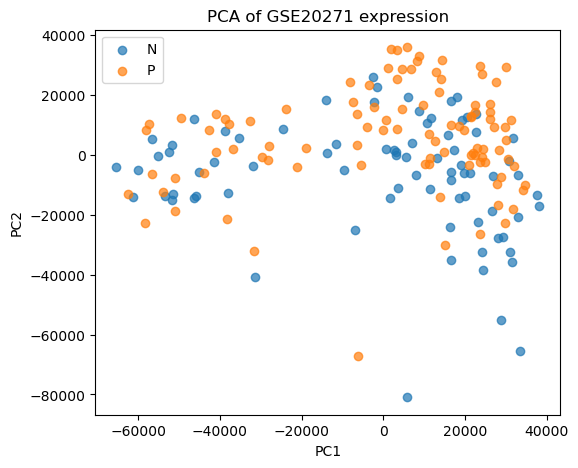

In [28]:
plt.figure(figsize=(6, 5))
for lbl in [0, 1]:
    idx = np.where(y == lbl)
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        label=("N" if lbl == 0 else "P"),
        alpha=0.7,
    )
plt.legend()
plt.title(f"PCA of {gse_id} expression")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Simple classification pipeline:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    expr_df, y, test_size=0.2, random_state=111, stratify=y
)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_score = model.decision_function(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_score))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7777777777777778
MCC: 0.575
ROC AUC: 0.8687499999999999
Confusion Matrix:
 [[14  2]
 [ 6 14]]


Add a standardization step:

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_score = model.decision_function(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_score))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7777777777777778
MCC: 0.575
ROC AUC: 0.871875
Confusion Matrix:
 [[14  2]
 [ 6 14]]


Add a standardization step within a Pipeline:

In [32]:
model = make_pipeline(StandardScaler(), SVC())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_score = model.decision_function(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_score))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7777777777777778
MCC: 0.575
ROC AUC: 0.871875
Confusion Matrix:
 [[14  2]
 [ 6 14]]


Next steps: cross-validate on the training set

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

model = make_pipeline(StandardScaler(), SVC())
cv_result = cross_validate(model, X_train, y_train, cv=10, scoring=make_scorer(matthews_corrcoef))
cv_result # test score = mcc score

{'fit_time': array([0.77948427, 0.79968882, 0.91281939, 0.88048553, 0.82038713,
        0.78720093, 0.82160425, 0.68337035, 0.77163291, 0.69452715]),
 'score_time': array([0.16820025, 0.14158797, 0.13594556, 0.2024889 , 0.15804362,
        0.13799763, 0.13969469, 0.13686585, 0.13865614, 0.14181876]),
 'test_score': array([ 0.33928571,  0.45833333,  0.70833333,  0.70833333,  0.41079192,
         0.34426519,  0.        ,  0.125     , -0.31622777,  0.4472136 ])}

In [34]:
pd.DataFrame(cv_result)

,fit_time,score_time,test_score
0,0.779484,0.168200,0.339286
1,0.799689,0.141588,0.458333
2,0.912819,0.135946,0.708333
3,0.880486,0.202489,0.708333
4,0.820387,0.158044,0.410792
5,0.787201,0.137998,0.344265
6,0.821604,0.139695,0.000000
7,0.683370,0.136866,0.125000
8,0.771633,0.138656,-0.316228
9,0.694527,0.141819,0.447214


Next steps: grid search on the training set

In [35]:
from sklearn.model_selection import GridSearchCV

model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("classifier", SVC()),
    ]
)

param_grid = {"classifier__C": (0.001, 0.01, 0.1, 1, 10, 100, 1000)}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=5, scoring=make_scorer(matthews_corrcoef))
model_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=2,
             param_grid={'classifier__C': (0.001, 0.01, 0.1, 1, 10, 100, 1000)},
             scoring=make_scorer(matthews_corrcoef, response_method='predict'))

In [36]:
model_grid_search.best_params_

{'classifier__C': 10}

In [37]:
pd.DataFrame(model_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.895229,0.075137,0.232338,0.003768,0.001,{'classifier__C': 0.001},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
1,0.949805,0.100097,0.274386,0.050794,0.010,{'classifier__C': 0.01},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
2,0.842361,0.010434,0.253263,0.025405,0.100,{'classifier__C': 0.1},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
3,0.785915,0.080842,0.273410,0.020966,1.000,{'classifier__C': 1},0.302885,0.781071,0.189990,0.308968,0.138462,0.344275,0.227997,4
4,0.733321,0.130769,0.278644,0.042608,10.000,{'classifier__C': 10},0.394231,0.781071,0.331133,0.071611,0.292308,0.374071,0.230680,1
5,0.753517,0.031856,0.265706,0.039428,100.000,{'classifier__C': 100},0.394231,0.781071,0.331133,0.071611,0.292308,0.374071,0.230680,1
6,0.671474,0.087017,0.243184,0.062836,1000.000,{'classifier__C': 1000},0.394231,0.781071,0.331133,0.071611,0.292308,0.374071,0.230680,1


In [38]:
y_pred = model_grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.8055555555555556

In [39]:
matthews_corrcoef(y_test, y_pred)

0.6047431568147635